# Notebook 2: Working with the re-gridded historical data

In this notebook, I'll be working with the re-gridded historical data that was obtained from the Regridding notebook

In [1]:
# Import statements
import xarray as xr
xr.set_options(display_style='html')
import intake
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import cartopy.crs as ccrs
import cartopy
import skill_metrics as sm
import numpy as np

 # CanESM5

Storing code in the next code block

In [2]:
write = False
if write:
    can_subset = col.search(table_id="Amon", variable_id = "pr", source_id = "CanESM5", experiment_id = 'historical')
    dset_dict = can_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
    can_dset = dset_dict['CMIP.CCCma.CanESM5.historical.Amon.gn']
    can_bc_dset = can_dset.sel(lon = slice(225.,239.0625), lat = slice(48.835241, 59.99702), time = slice('1960', '2010'))
    print("got here")
    can_bc_dset.load().to_netcdf("can_bc_dset.nc")

Load in the data from file and checking it by plot quickly

<xarray.Dataset> Size: 3MB
Dimensions:         (lat: 3, bnds: 2, lon: 6, member_id: 65, dcpp_init_year: 1,
                     time: 612)
Coordinates:
  * lat             (lat) float64 24B 51.63 54.42 57.21
    lat_bnds        (lat, bnds) float64 48B ...
  * lon             (lon) float64 48B 225.0 227.8 230.6 233.4 236.2 239.1
    lon_bnds        (lon, bnds) float64 96B ...
  * time            (time) object 5kB 1960-01-16 12:00:00 ... 2010-12-16 12:0...
    time_bnds       (time, bnds) object 10kB ...
  * member_id       (member_id) <U9 2kB 'r10i1p1f1' 'r10i1p2f1' ... 'r9i1p2f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: bnds
Data variables:
    pr              (member_id, dcpp_init_year, time, lat, lon) float32 3MB ...
Attributes: (12/47)
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        1850:01:01:00
    activity_id:                      CMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             0.0
    contact:                          ec.cccma.info-info.ccmac.ec@canada.ca
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     pr
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CCCma.CanESM5.historical.Amon.gn

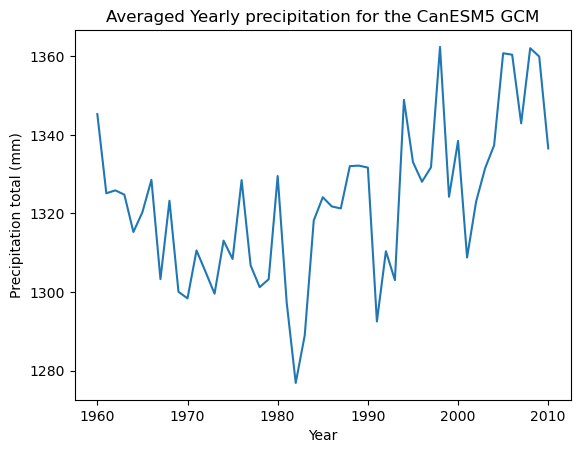

In [3]:
bc_dset = xr.open_dataset('can_bc_dset.nc')
mean_precip = bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
plt.figure()
mean_precip.mean('member_id').pr.plot()
can_avg = mean_precip.mean('member_id')
plt.title("Averaged Yearly precipitation for the CanESM5 GCM")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')
bc_dset

Create the yearly total accumulation figure which will be used in the report:

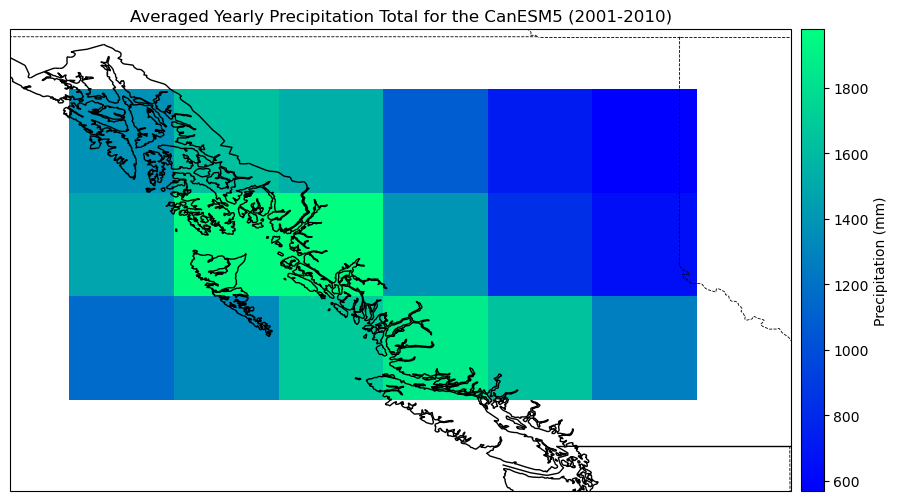

In [7]:
## Try plotting on a map for 2010

can_20_map = bc_dset.sel(time=slice('2001', '2010'))
can_20_map = can_20_map.groupby('time.year').mean('time')*86400*365
can_20_map = can_20_map.mean('year').mean('member_id')

precip_data2010 = can_20_map

fig = plt.figure(1, figsize=[12,6])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-138, -117, 47.8, 60.2])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)

precip_data2010.pr.plot(ax=ax, cmap='winter', cbar_kwargs={'label': "Precipitation (mm)", 'pad':0.01})
ax.title.set_text("Averaged Yearly Precipitation Total for the CanESM5 (2001-2010)")

# HadGEM3

Repeat with the Hadley model

In [8]:
hadGEM = False
if hadGEM:
    had_subset = col.search(table_id="Amon", variable_id = "pr", source_id = "HadGEM3-GC31-MM", experiment_id = 'historical')
    dset_dict = had_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
    had_dset = dset_dict['CMIP.MOHC.HadGEM3-GC31-MM.historical.Amon.gn']
    had_bc_dset = had_dset.sel(lon = slice(225.4, 239.6), lat = slice(48.835241, 59.99702), time = slice('1960', '2010'))
    had_bc_dset.load().to_netcdf('had_bc_dset.nc')
    print('done')

Text(0, 0.5, 'Precipitation total (mm)')

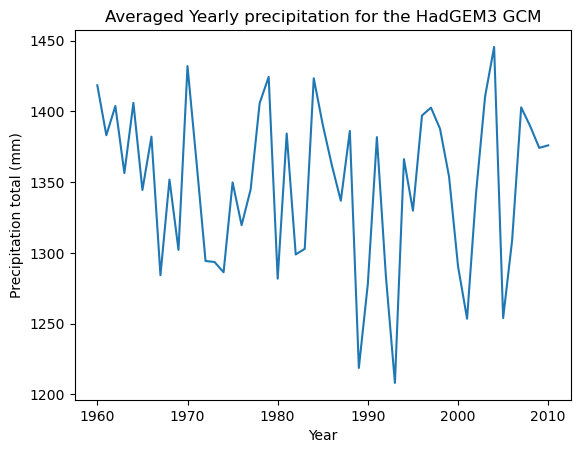

In [9]:
had_bc_dset = xr.open_dataset('had_regrid.nc')
mean_precip_had = had_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
plt.figure()
mean_precip_had.mean('member_id').pr.plot()
plt.title("Averaged Yearly precipitation for the HadGEM3 GCM")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')


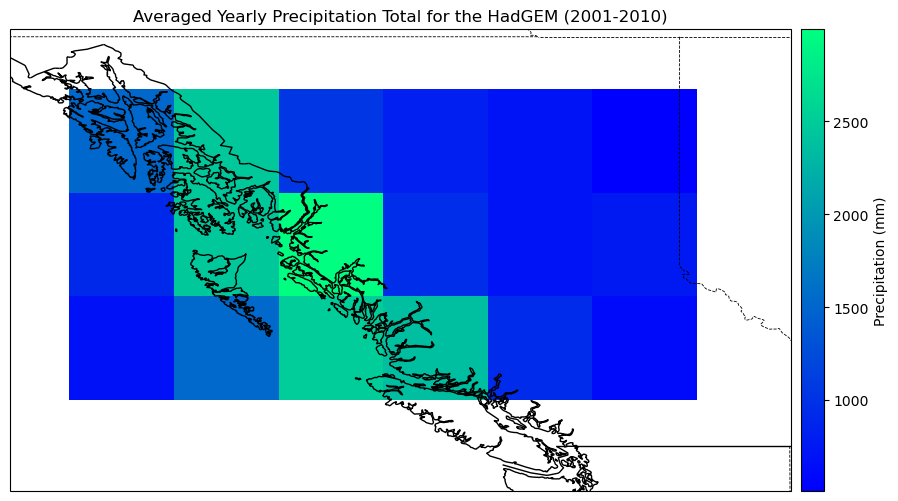

In [13]:
can_20_map = had_bc_dset.sel(time=slice('2001', '2010'))
can_20_map = can_20_map.groupby('time.year').mean('time')*86400*365
can_20_map = can_20_map.mean('year').mean('member_id')

precip_data2010 = can_20_map

fig = plt.figure(1, figsize=[12,6])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-138, -117, 47.8, 60.2])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)

precip_data2010.pr.plot(ax=ax, cmap='winter', cbar_kwargs={'label': "Precipitation (mm)", 'pad':0.01})
ax.title.set_text("Averaged Yearly Precipitation Total for the HadGEM (2001-2010)")

# GISS
Repeat with the GISS model

In [14]:
GISS = False
if GISS:
    gis_subset = col.search(table_id="Amon", variable_id = "pr", source_id = "GISS-E2-1-H", experiment_id = 'historical')
    dset_dict = gis_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
    gis_dset = dset_dict['CMIP.NASA-GISS.GISS-E2-1-H.historical.Amon.gn']
    gis_bc_dset = gis_dset.sel(lon = slice(226.25, 238.75), lat = slice(48.835241, 59.99702), time = slice('1960', '2010'))
    gis_bc_dset.load().to_netcdf('gis_bc_dset.nc')

Text(0, 0.5, 'Precipitation total (mm)')

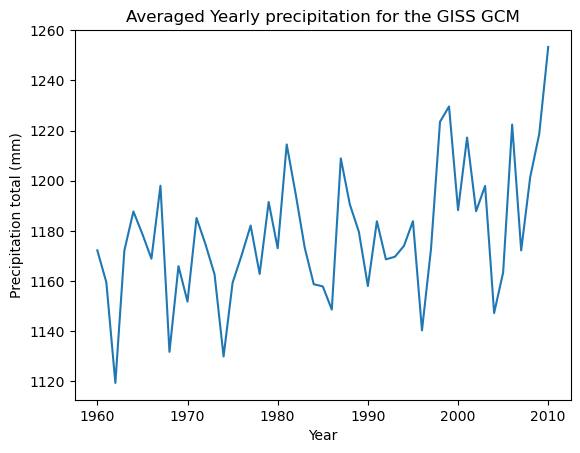

In [15]:
gis_bc_dset = xr.open_dataset('gis_regrid.nc')
mean_precip_gis = gis_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
plt.figure()
mean_precip_gis.mean('member_id').pr.plot()
plt.title("Averaged Yearly precipitation for the GISS GCM")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

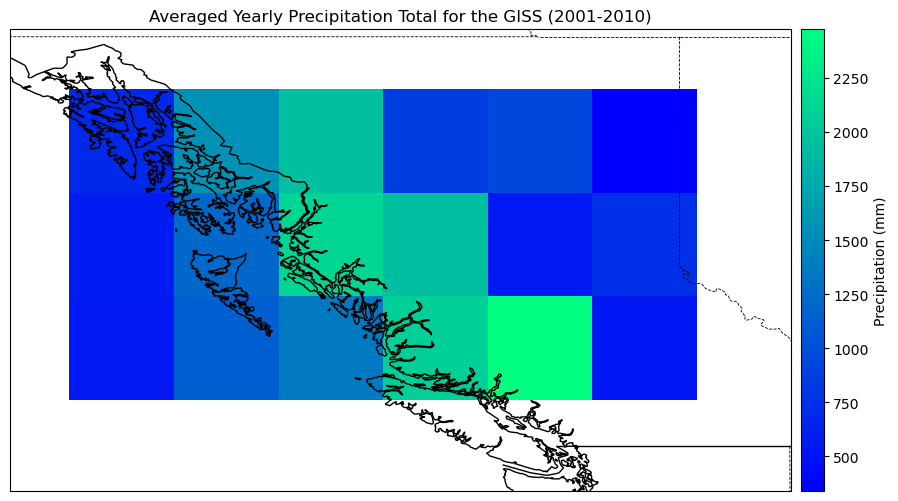

In [19]:
can_20_map = gis_bc_dset.sel(time=slice('2001', '2010'))
can_20_map = can_20_map.groupby('time.year').mean('time')*86400*365
can_20_map = can_20_map.mean('year').mean('member_id')

precip_data2010 = can_20_map

fig = plt.figure(1, figsize=[12,6])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-138, -117, 47.8, 60.2])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)

precip_data2010.pr.plot(ax=ax, cmap='winter', cbar_kwargs={'label': "Precipitation (mm)", 'pad':0.01})
ax.title.set_text("Averaged Yearly Precipitation Total for the GISS (2001-2010)")

In [20]:
can_20_map

<xarray.Dataset> Size: 224B
Dimensions:         (dcpp_init_year: 1, lat: 3, lon: 6)
Coordinates:
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
  * lat             (lat) float64 24B 51.63 54.42 57.21
  * lon             (lon) float64 48B 225.0 227.8 230.6 233.4 236.2 239.1
Data variables:
    pr              (dcpp_init_year, lat, lon) float64 144B 552.3 ... 339.4

## Monthly correlations for BC

In the next few cells, I'll be creating Taylor diagrams for the monthly precipiation distribution for 10-20 year periods as well as line graphs for the models that will be used in the report

## Creating line plot and Taylor diagram for 2001-2010

Create the line plots by slicing the data to get the correct time series, then convert to mm and plot along with standard deviation bars

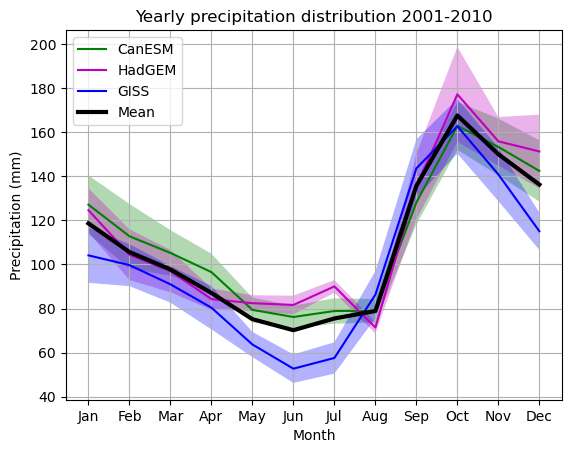

In [23]:
## Here we plot 20 year periods at a time

can_year = bc_dset.sel(time=slice('2001', '2010'))
had_year = had_bc_dset.sel(time=slice('2001', '2010'))
gis_year = gis_bc_dset.sel(time=slice('2001', '2010'))

can_20 = can_year.groupby('time.month').mean('time').mean(['lon', 'lat'])*86400*30.4
had_20 = had_year.groupby('time.month').mean('time').mean(['lon', 'lat'])*86400*30.4
gis_20 = gis_year.groupby('time.month').mean('time').mean(['lon', 'lat'])*86400*30.4

can_20_std = can_20.std('member_id')
had_20_std = had_20.std('member_id')
gis_20_std = gis_20.std('member_id')

can_20 = can_20.mean('member_id')
had_20 = had_20.mean('member_id')
gis_20 = gis_20.mean('member_id')

mean = (can_20.pr+had_20.pr+gis_20.pr)/3

time = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, axs = plt.subplots(1, 1)
axs.plot(time,can_20.pr, label='CanESM', color='g')
axs.plot(time, had_20.pr, label='HadGEM', color='m')
axs.plot(time, gis_20.pr, label='GISS', color='b')
axs.fill_between(time, (can_20-can_20_std).pr.to_numpy().flatten(), (can_20+can_20_std).pr.to_numpy().flatten(), alpha=0.3, facecolor='g')
axs.fill_between(time, (had_20-had_20_std).pr.to_numpy().flatten(), (had_20+had_20_std).pr.to_numpy().flatten(), alpha=0.3, facecolor='m')
axs.fill_between(time, (gis_20-gis_20_std).pr.to_numpy().flatten(), (gis_20+gis_20_std).pr.to_numpy().flatten(), alpha=0.3, facecolor='b')
axs.plot(time, mean, label='Mean', color='k', linewidth=3)
axs.set_xlabel('Month')
axs.set_ylabel('Precipitation (mm)')
axs.set_title('Yearly precipitation distribution 2001-2010')
axs.legend()
axs.grid()

Checking th historical mean array to see if it is reasonable

In [24]:
mean

<xarray.DataArray 'pr' (month: 12, dcpp_init_year: 1)> Size: 96B
array([[118.59358736],
       [105.62031652],
       [ 97.71935375],
       [ 87.05823408],
       [ 75.17033318],
       [ 70.16559544],
       [ 75.49150099],
       [ 78.88176   ],
       [135.64178059],
       [167.53687402],
       [149.96860291],
       [136.2122707 ]])
Coordinates:
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
  * month           (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

Now creating the Taylor diagram for the timeseries datasets using the SkillsMetrics Library

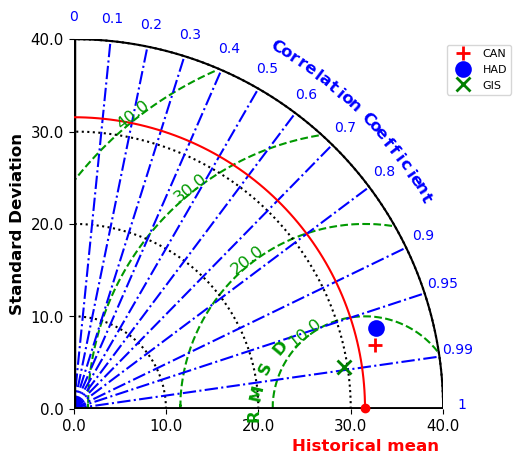

In [25]:
### Monthly correlation for 2001-2010

can = can_20.pr.to_numpy().flatten()
ref = mean.to_numpy().flatten()
had = had_20.pr.to_numpy().flatten()
gis = gis_20.pr.to_numpy().flatten()

data = {'ref': ref, 'can': can, 'had': had, 'gis':gis}

taylor_stats1 = sm.taylor_statistics(data['had'], data['ref'], 'data')
taylor_stats2 = sm.taylor_statistics(data['gis'], data['ref'], 'data')
taylor_stats3 = sm.taylor_statistics(data['can'], data['ref'], 'data')


sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                 taylor_stats2['sdev'][1], taylor_stats3['sdev'][1]])
crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                  taylor_stats2['crmsd'][1], taylor_stats3['crmsd'][1]])
ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                      taylor_stats2['ccoef'][1], taylor_stats3['ccoef'][1]])

# Specify labels for points in a cell array (M1 for model prediction 1,
# etc.). Note that a label needs to be specified for the reference even
# though it is not used.
label = ['Non-Dimensional Observation', 'CAN','HAD', 'GIS']

'''
Produce the Taylor diagram

Display the data points for correlations that vary from -1 to 1 (2
panels). Label the points and change the axis options for SDEV, CRMSD,
and CCOEF. Increase the upper limit for the SDEV axis and rotate the
CRMSD contour labels (counter-clockwise from x-axis). Exchange color and
line style choices for SDEV, CRMSD, and CCOEFF variables to show effect.
Increase the line width of all lines.

For an exhaustive list of options to customize your diagram, 
please call the function at a Python command line:
>> taylor_diagram
'''
sm.taylor_diagram(sdev,crmsd,ccoef, styleOBS = '-', 
                      colOBS = 'r', markerobs = 'o', 
                      titleOBS = 'Historical mean', markerLabel=label, markerLegend='on')

## Creating maps of standard deviation

Below I'll create maps of British columbia to supplement the other maps created above. This is to show where in the province there is larger standard deviation and variability.

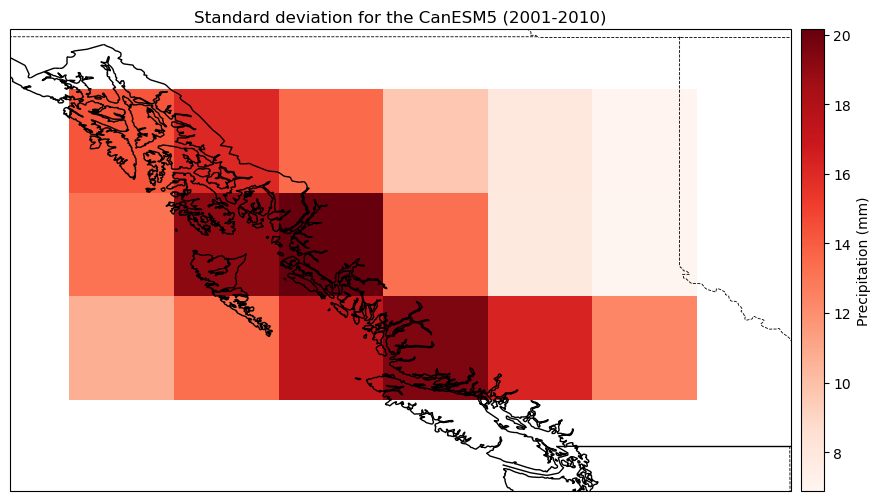

In [29]:
## Start by getting the standard deviation arrays
std_can = can_year.groupby('time.month').mean('time')
std_can = std_can.std('member_id')


map = std_can.mean('month')*86400*30.4

fig = plt.figure(1, figsize=[12,6])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-138, -117, 47.8, 60.2])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)

map.pr.plot(ax=ax, cmap='Reds', cbar_kwargs={'label': "Precipitation (mm)", 'pad':0.01})
ax.title.set_text("Standard deviation for the CanESM5 (2001-2010)")

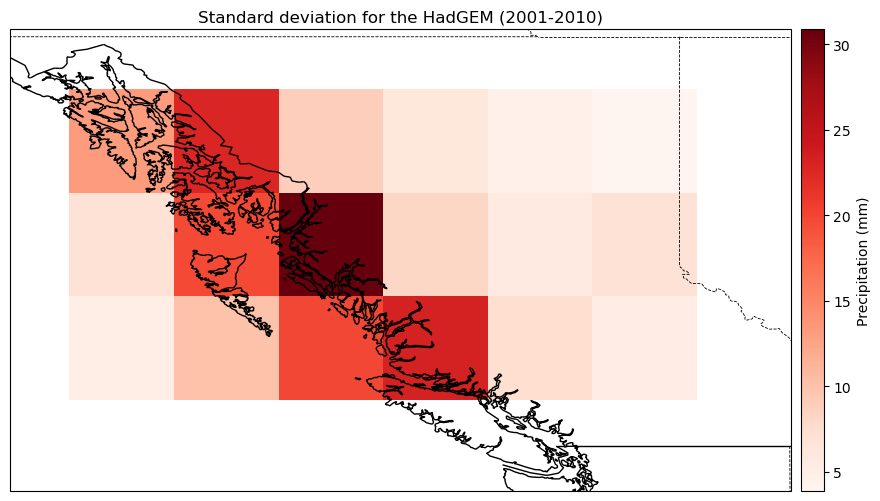

In [30]:
## Start by getting the standard deviation arrays
std_had = had_year.groupby('time.month').mean('time')
std_had = std_had.std('member_id')


map = std_had.mean('month')*86400*30.4

fig = plt.figure(1, figsize=[12,6])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-138, -117, 47.8, 60.2])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)

map.pr.plot(ax=ax, cmap='Reds', cbar_kwargs={'label': "Precipitation (mm)", 'pad':0.01})
ax.title.set_text("Standard deviation for the HadGEM (2001-2010)")

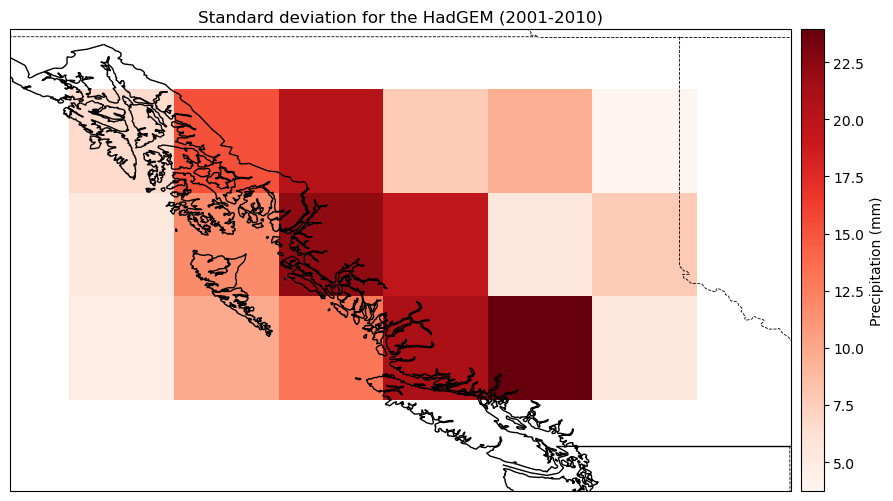

In [31]:
std_gis = gis_year.groupby('time.month').mean('time')
std_gis = std_gis.std('member_id')


map = std_gis.mean('month')*86400*30.4

fig = plt.figure(1, figsize=[12,6])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-138, -117, 47.8, 60.2])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)

map.pr.plot(ax=ax, cmap='Reds', cbar_kwargs={'label': "Precipitation (mm)", 'pad':0.01})
ax.title.set_text("Standard deviation for the HadGEM (2001-2010)")